# ABM 1 
## Spatial segregation

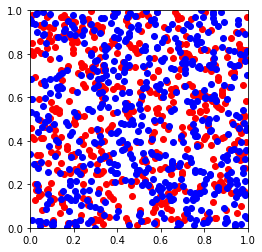

In [84]:
from pylab import *

n = 1000 # number of agents
r = 0.1 # neighborhood radius
thresh = 0.5 # threshold for moving
round = 0

class agent:
    pass

def initialise():
    global agents
    agents = []
    for i in range(n):
        ag = agent()
        ag.type = randint(2)
        ag.x = random()
        ag.y = random()
        agents.append(ag)
    
def observe():
    global agents
    cla()
    red = [ag for ag in agents if ag.type == 0]
    blue = [ag for ag in agents if ag.type == 1]
    plot([ag.x for ag in red], [ag.y for ag in red], 'ro')
    plot([ag.x for ag in blue], [ag.y for ag in blue], 'bo')
    axis('image')
    axis([0, 1, 0, 1])

def update():
    global agents, round
    ag = choice(agents)
    neighbours = [nb for nb in agents
                 if (ag.x - nb.x)**2 + (ag.y - nb.y)**2 < r**2 and nb != ag]
    if len(neighbours) > 0:
        q = len([nb for nb in neighbours if nb.type == ag.type]) \
            / float(len(neighbours))
        if q < thresh:
            ag.x, ag.y = random(), random()
    round = round + 1

initialise()
while round < 100:
    observe()
    update()

___
# Comments

We want to define agents in a city.
therefore we need to define the paramenters
* number of agents $n$
* radius $r$ from an agent defining its neighbourhood
* segregation threshold $thresh$: if less than fraction t of nehgboutrours is of the same type, agent moves
if $thresh$ = 0: agent does not require neghbours to be simlar
if $thresh$ = 0.4: agent moves if less than 40% of neighbours are of his type
if $thresh$ = 1: agent moves unless all neighbours are of its type
* $round$ = simulation round (one agent move) 

This ABM requires library **pylab**


In [59]:
from pylab import *

n = 1000 # number of agents
r = 0.1 # neighborhood radius
thresh = 0.5 # threshold for moving
round = 0

Now we define a class for agents 

In [ ]:
class agent:
    pass 

* **Initialisation:**   

In [63]:
def initialise(): # define function initialise()
    global agents # since agents are required by other functions in the simulation, we define it as a global variable 
    agents = [] # an empty list created to store all our n agents ag 
    for i in range(3): # loop repeats commands n times, range(n) means from 0 to n-1
        ag = agent() # ag is agent(i), is appended to agents, and then rewritten for each i (it is a local variable)
        ag.type = randint(2) # randint(2) to randomly selects agent type 0 or 1
        ag.x = random() # we define an x position between 0 and 1 with random()
        ag.y = random() # same for y position, so city is a 2D space ranging from x = (0,1) and y = (0,1) 
        agents.append(ag) # after defining ag, we append it as agent (i) to agents(), and recycle ag for next agent 

In [77]:
randint(2)
random()
agents[2].type

0.5030994061218984

* **Observation:**

In [ ]:
def observe(): # define function observe()
    global agents # we need agents created above, so we are calling the golbal values of agents
    cla() # clears previous figure axes, which can then be updated, clf() clears figure and wrks as well   
    red = [ag for ag in agents if ag.type == 0] # red is a list of agents ag, from agents, of type 0 
    blue = [ag for ag in agents if ag.type == 1]
    plot([ag.x for ag in red], [ag.y for ag in red], 'ro') 
    plot([ag.x for ag in blue], [ag.y for ag in blue], 'bo')
    axis('image')
    axis([0, 1, 0, 1])

**Exercise:** 
<br>the code:</br>
    <br>red = [ag for ag in agents if ag.type == 0]</br> 
<br>condensed four lines of code into one. How would you write it in extended form?</br>  

<details><summary><u>Answer:</u></summary>
<p>
red = [ ] <br>
for ag in agents: <br>
    if ag.type == 0: <br>
        append.red(ag)   
</p>
</details>

* **Updating:**

In [ ]:
def update(): # define update function
    global agents, round # we also want to store value of round globally, so that it is not overwritten after each update  
    ag = choice(agents) # choice() selects one element of a list, or here one random agent
    neighbours = [nb for nb in agents 
                 if (ag.x - nb.x)**2 + (ag.y - nb.y)**2 < r**2 and nb != ag] # see exercise
    if len(neighbours) > 0: #if ag has at least one neighbour 
        q = len([nb for nb in neighbors if nb.type == ag.type]) \  # q = size of group of nb's of same type as ag
            / float(len(neighbors))   # divided by size of group of all nb's of ag
        if q < thresh: # if proportion q of same-type neighbours below ag threshold 
            ag.x, ag.y = random(), random() # ag is given new random location  
    round = round + 1

**Exercise:**
rewrite and interpret the code line <br>
neighbours = [nb for nb in agents if (ag.x - nb.x)""**"2 + (ag.y - nb.y)""**"2 < r"**"2 and nb != ag]

* **Running simulation:**

In [ ]:
initialise()
while round < 1000: # run observe() and update() functions 1000 times
    observe()
    update()

# **Practical:**

a) Run the simulation each for thresh = (0.1, 0.2,..., 1). (n=1000). Plot the final dstributions in markdown.

b) Increase radius to 0.2 and 0.3 (for thresh = 0.5). Plot results.

c) Run simulation with n = 100, 5000. Plot results.